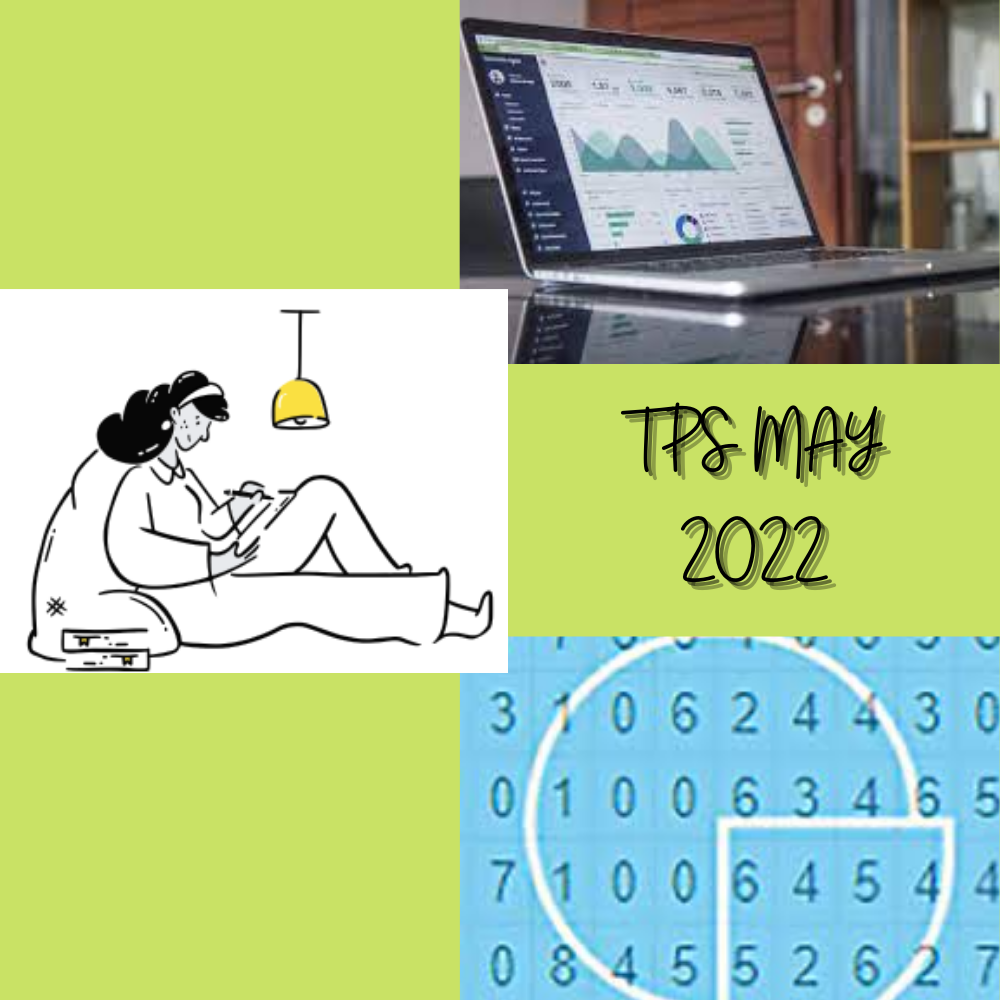

# <p style="text-align:center;font-size:150%;font-family:Roboto;background-color:#a04070;border-radius:50px;font-weight:bold;margin-bottom:0">April TPS</p>

<p style="font-family:Roboto;font-size:120%;color:#a04070;">In this Notebook, I had implemented the model to predict the state of machines based on 31 anonymized features. Later in the notebook I implemented a neural network to boost accuracy from 90% to 97% and above. I hope you enjoy reading this notebook.<p> 

<!-- <a id='top'></a> -->
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#a04070;font-family:Roboto;font-size:160%;text-align:center;border-radius:50px;">TABLE OF CONTENTS</p>   
    
* [1. Importing Libraries](#1)
    
* [2. Exploratory Data Analysis](#2)
    
* [3. BaseLine Solution](#3)
    
* [4. Decoding <code>f_27</code>](#4) 
    
* [5. Neural Network](#5) 
      
* [6. The End](#6)


<a id="1"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">IMPORTING LIBRARIES</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Exploratory Data Analysis</p>
<p style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;">If we read the data section of the competition then we get to know that the data has been already cleaned and preprocessed. Along with only one categorical column which I had explored in this notebook later.</p>

In [ ]:
df = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')
print(df.shape)
df.head()

In [ ]:
df.info()

In [ ]:
df['target'].value_counts().plot.bar()

<p style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;">So, here we have equal number of positive and negative examples.</p>

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr() > 0.8, cbar=False, annot=True)
plt.show()

<p style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;">Certainly none of the features are highly correlated with each other.</p>

In [ ]:
df.groupby('target').mean()

<p style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;">Some comparable difference between the mean values for the two class of targets can be observed prom the above output.<br>Like means of the features for the target 0 is negative generally.</p>

<a id="3"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Baseline Solution</p>
<p style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;">As the data is cleaned and preprocessed already we can build a base line model right at the beginning so, that it can guide in our journey of feature engineering.</p>

In [ ]:
features = df.drop(['id', 'target', 'f_27'], axis=1)
target = df['target']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.01, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
print(X_train.shape, X_val.shape)

In [ ]:
model = XGBClassifier()


model.fit(X_train, Y_train)
print('XGBClassifier : ')
print('Training accuracy : ',metrics.roc_auc_score(Y_train, model.predict(X_train)))
print('Validation accuracy : ',metrics.roc_auc_score(Y_val, model.predict(X_val)))

<a id="4"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Decoding <code>f_27</code></p>
<ul style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;"><code>f_27</code> is the only categorical column in our data and is of length 10 containing uppercase letters. I decoded this columns by taking consideration of two points:
<li>For letters from A to Z I had created a column for each and it's entry is the count of that character in the string corresponding to that row in <code>f_27</code>.</li>
<li>But in the above process positional information of the characters get lost so, for 10 positions I had stored the <code>ASCII</code> code of the character present at that position.</li>
</ul>

In [ ]:
df['f_27'] = df['f_27'].str.upper()
# To ensure all the string characters are capitalized.

df['length'] = df['f_27'].str.len()
print(df['length'].min(), df['length'].max())

In [ ]:
def add_letters_count(data):

  letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

  for char in letters:
    data[char] = data['f_27'].str.count(char)

  return data

df = add_letters_count(df)
df.head()

In [ ]:
plt.figure(figsize=(10,10))
df.loc[:,'A':'Z'].sum().plot.bar()
plt.show()

In [ ]:
# Columns with zero entries should be removed.

def remove_zero(data):    
  cross_check = 'UVWXYZ'
  for char in cross_check:
    if data[char].sum() == 0:
      data = data.drop([char], axis=1)
  
  return data

df = remove_zero(df)
df.head()

In [ ]:
plt.subplots(figsize=(20,20))

for i, col in enumerate(df.loc[:,'A':'T']):
  plt.subplot(5,4, i+1)
  sb.countplot(x=df[col]>0, hue=df['target'])
plt.show()

In [ ]:
def add_pos(data):
  for i in range(10):
    data['pos' + str(i)] = (data['f_27'].str[i]).apply(lambda x: ord(x)) - 75

  return data

df = add_pos(df)
df.head()

<p style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;">No as such relation between between the presence of a character in the string and the target.</p>

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr() > 0.8, cbar=False, annot=True)
plt.show()

In [ ]:
features = df.drop(['id', 'target', 'f_27', 'length'], axis=1)
target = df['target']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.01, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
model = XGBClassifier()

model.fit(X_train, Y_train)
print('XGBClassifier : ')
print('Training accuracy : ',metrics.roc_auc_score(Y_train, model.predict(X_train)))
print('Validation accuracy : ',metrics.roc_auc_score(Y_val, model.predict(X_val)))

<a id="5"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Learning non-linear Complex Model</p>
<p style="color:#a04070;font-family:Roboto;font-size:140%;margin-bottom:0">Improvement from 85% to 90% can be observed here by addition of some extra features on the same model of XGBClassifier may be changing the model help even more.</p>

In [ ]:
model = keras.Sequential([
  layers.Input(shape=(60,)),

  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),

  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),

  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),

  layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = ['AUC']
)

model.summary()

In [ ]:
history = model.fit(X_train, Y_train,
                    verbose = 1,
                    batch_size = 128,
                    epochs = 5,
                    validation_data = (X_val, Y_val))

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['auc','val_auc']].plot()
plt.show()

In [ ]:
df_test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv')
df_test.head()

In [ ]:
# Adding the same features and in the same order as we did in the training data.

df_test['f_27'] = df_test['f_27'].str.upper()
df_test = add_letters_count(df_test)
df_test = remove_zero(df_test)
df_test = add_pos(df_test)

print(df_test.shape)
df_test.head()

In [ ]:
test = df_test.drop(['f_27', 'id'], axis=1)
test = scaler.transform(test)
predictions = model.predict(test)

In [ ]:
ss = pd.read_csv('../input/tabular-playground-series-may-2022/sample_submission.csv')
ss['target'] = np.where(predictions>0.5, 1, 0)
ss['target'].value_counts().plot.bar()
plt.show()

<p style="font-family:Roboto;font-size:140%;margin-up:0;color:#a04070;">If a model just predict 0 or 1 even that will be 50% accurate. This means that our data set contains equal number of cases for positve and negative as well.</p>

In [ ]:
ss['target'] = predictions
ss.to_csv('Submission.csv', index=False)
ss.head()

<a id="6"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">The End</p>

<p style="color:#a04070;font-family:Roboto;font-size:140%;margin-bottom:0">Due to providing preprocessed data which has been cleaned as well it became easy to directly jump to build a baseline solution. Although this categorical column has provided some really valuable features to us else we won't be able to improve the performance upto 99% easily.</p>